## Soft Task Space
Initialise nework with desired hyperparameters.

In [1]:
import numpy as np
np.seterr(all='ignore')
from networks import simple_network
from utils import *
simple_hyperparameters = {'N_train' : 1000, #size of training dataset 
                          'N_test' : 100, #size of test set x
                          'lr' : 0.001, #SGD learning rate 
                          'epochs' : 10, #training epochs
                          'batch_size' : 10,  #batch size (large will probably fail)           
                          'context_location' : 'start',  #where the feed in the task context 'start' vs 'end'
                          'train_mode' : 'random', #training mode 'random' vs 'replay' 
                          'second_task' : 'prod', #first task adds x+y, second task 'prod' = xy or 'add1.5' = x+1.5y
                          'fraction' : 0.50, #fraction of training data for tasks 1 vs task 2
                          'hidden_size' : 25, #hidden layer width
                          'rule1_grad' : 0,
                          'rule2_grad' : 1,
                          'delta_theta': 90}

simple_model = simple_network(simple_hyperparameters)

c:\Users\Luke\anaconda3\envs\ModNet\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Plot vector rulespace.

In [ ]:
rule1, rule2 = simple_model.rules()
plot_rulespace(rule1, rule2, simple_model.x1_test[:,:2])

Train multiple models (with relative importance metric).

In [ ]:
N_models = 100
models_RI = train_multiple('simple_network', simple_hyperparameters, N_models = N_models)
plot_training(models_RI)


Train multiple models (with importance similarity metric).

In [ ]:
N_models = 100
models_IS, IS_history = train_IS_history('simple_network', simple_hyperparameters, N_models = N_models)
plot_training(models_IS)

Plot relative importance.

In [ ]:
plot_RI(models_RI)

Plot relative importance over variation in theta (angle between rule vectors).

In [ ]:
theta_variation(model_class='simple_network')

Randomly sample theta and plot RI, variance of RI and IS

[-141.104122   -124.62341404 -112.99911493 -107.94603317  -86.86895846
  -60.29687842  -37.5990806    -4.40177564   94.72960424  164.21726977]


Theta: 100%|██████████| 10/10 [01:12<00:00,  7.26s/it]


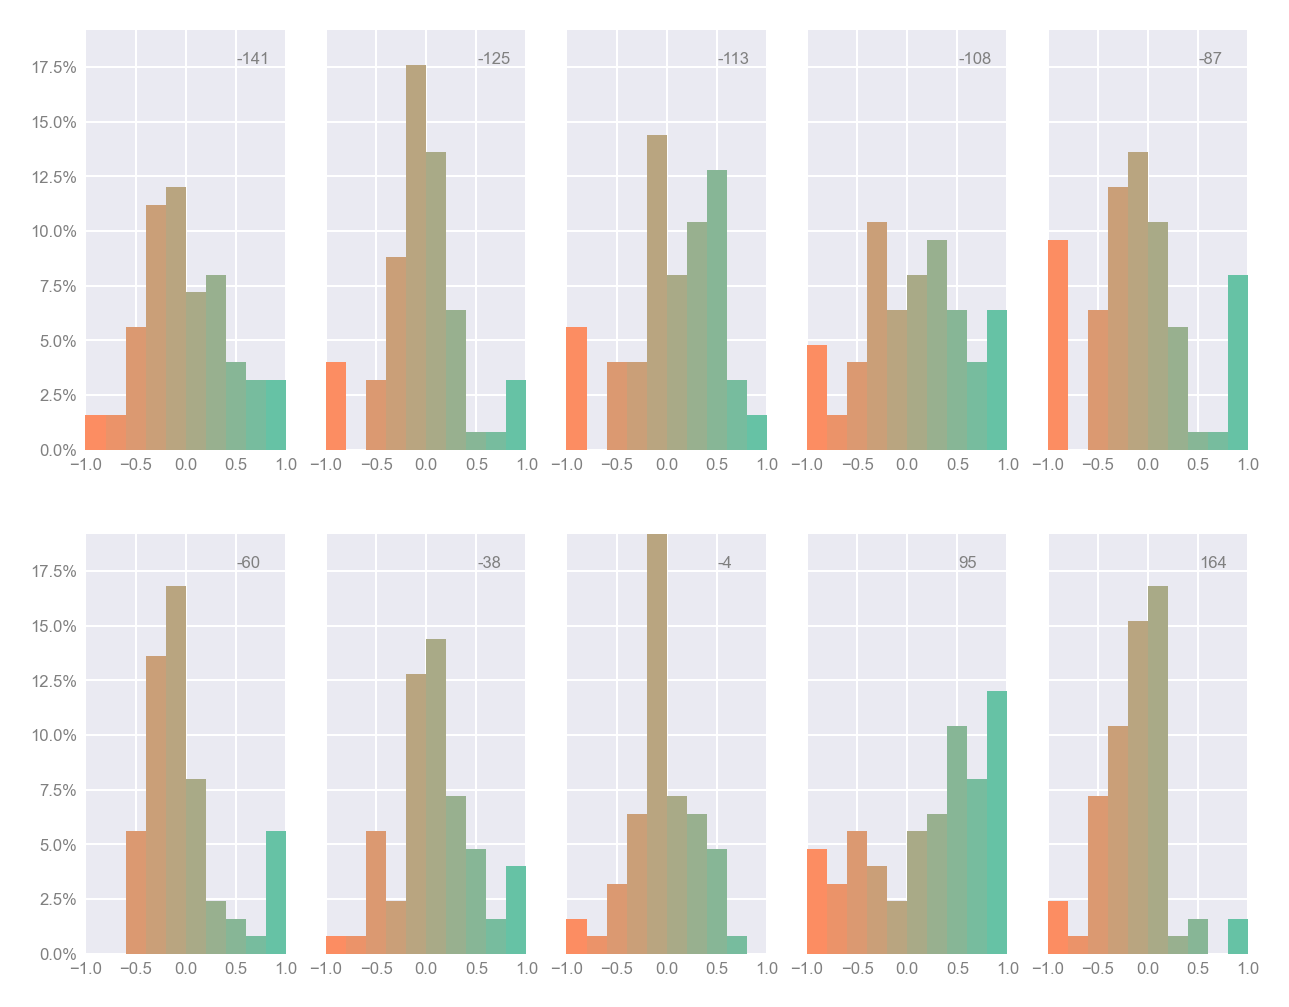

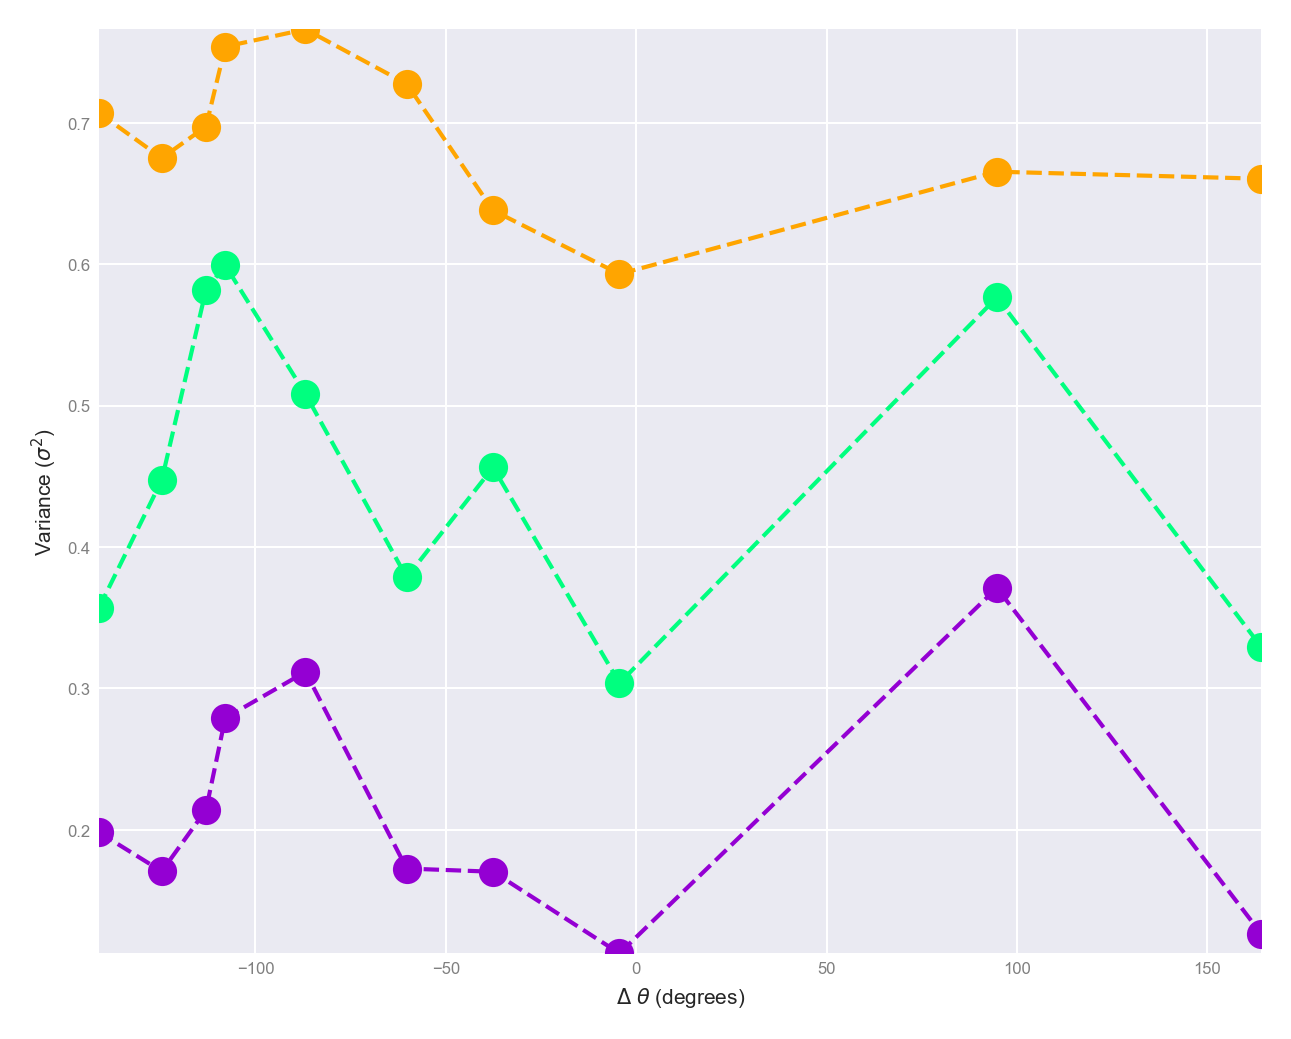

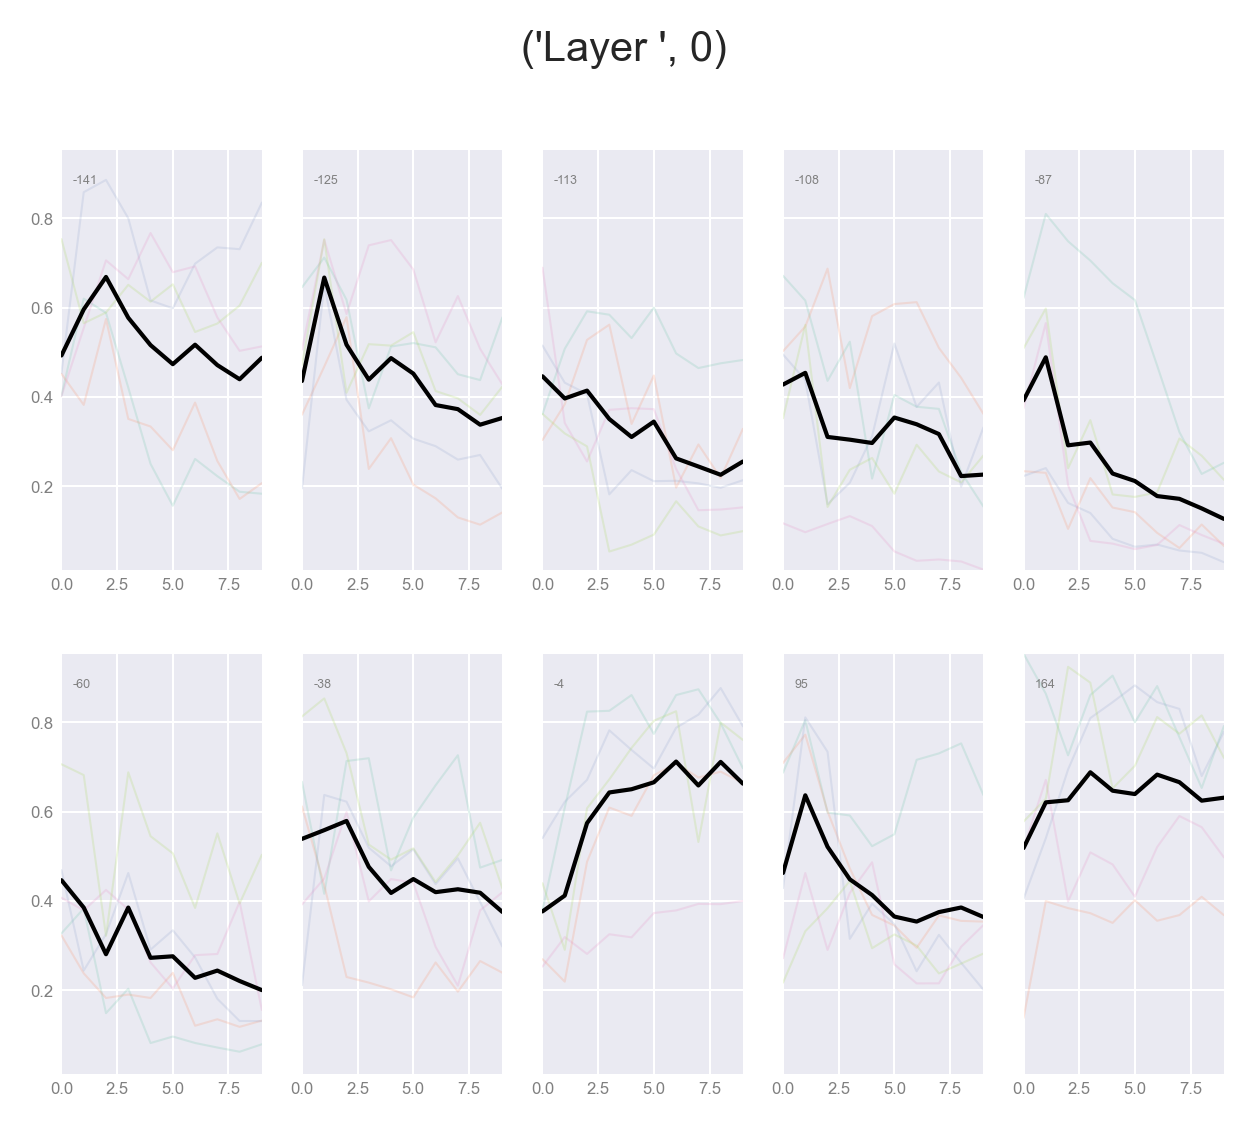

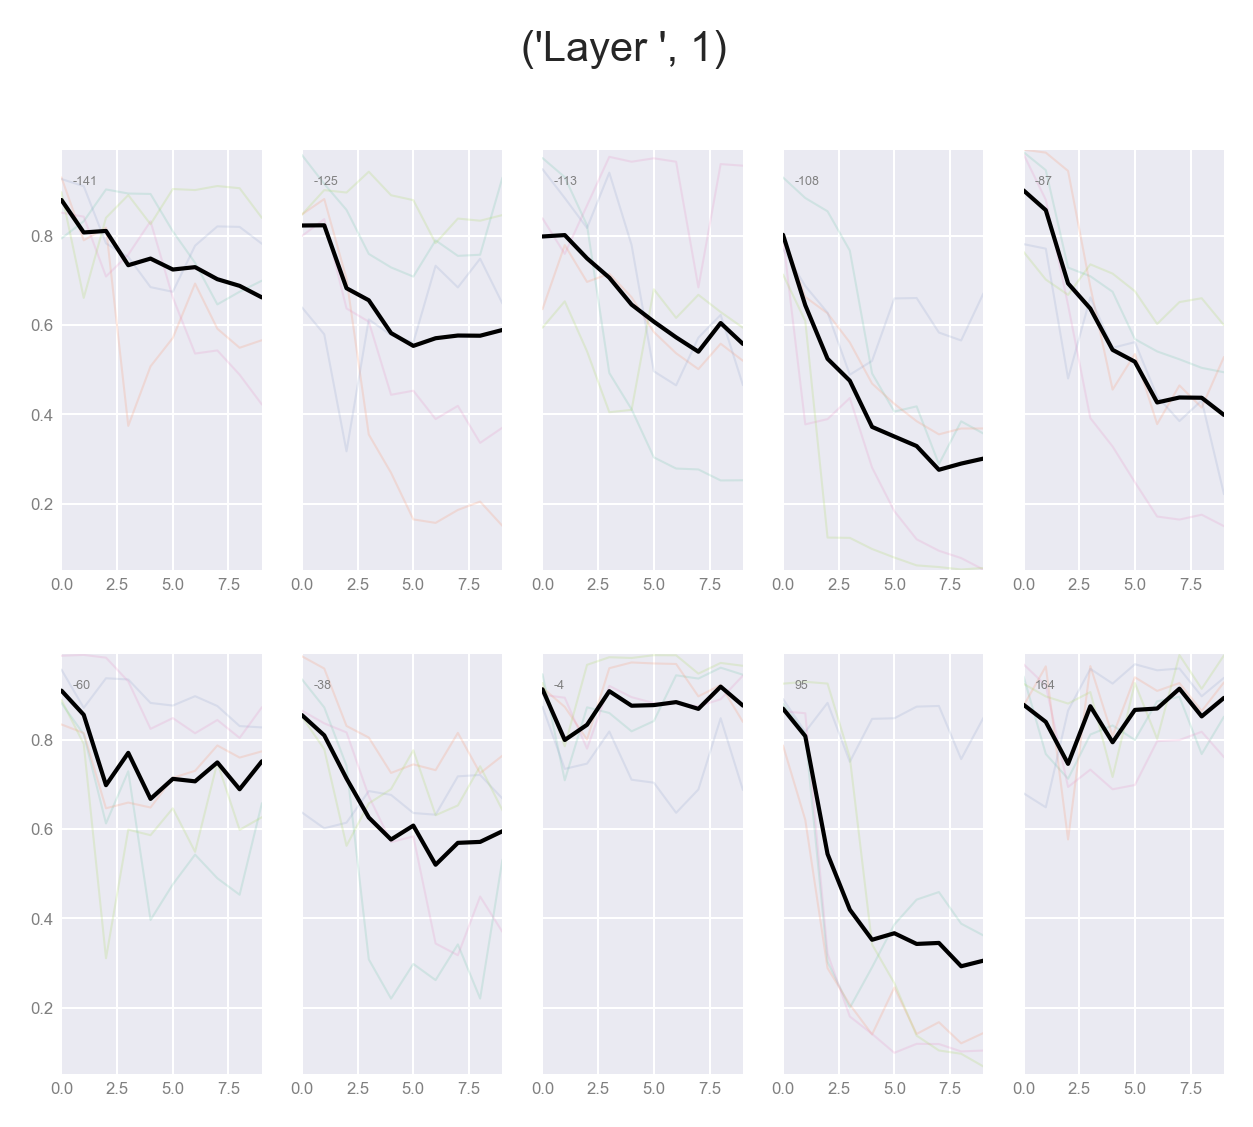

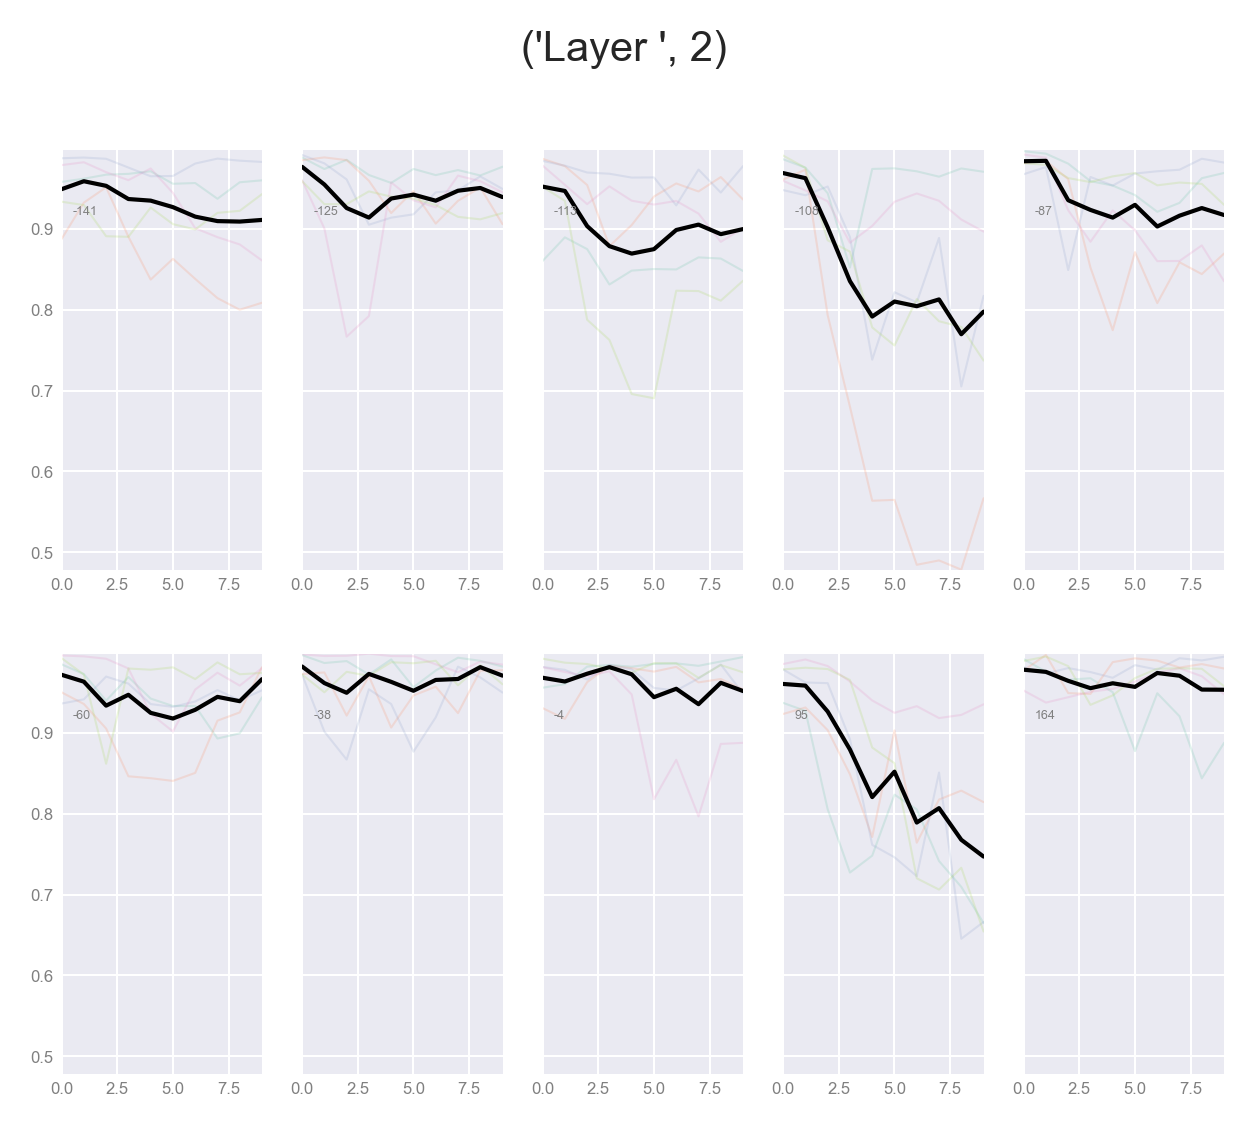

In [2]:
theta_sampling(model_class='simple_network', hyperparameters=simple_hyperparameters, N_models=5, N_theta=10)

Plot absolute importance (*needs fixing*).

In [ ]:
plot_I(models_IS)

Plot importance similarity.

In [ ]:
plot_IS(models_IS)
plot_IS_history(models_IS, IS_history, simple_hyperparameters)